In [ ]:
# importamento das bibliotecas
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import numpy as np
import plotly.express as px
import scipy.stats as stats

# Salvamento dos dados coletados e construção do dataframe
with open("data.txt", "r") as datas:
  data_list = list(map(float, datas.read().split()))
df = pd.DataFrame(data_list, columns=["Amostras coletadas"])
df

,Amostras coletadas
0,1.09081
1,0.96804
2,1.58838
3,0.75088
4,1.47238
...,...
995,1.91768
996,1.55088
997,1.16803
998,1.13794


# Medidas de dispersão

In [ ]:
# Medidas de dispersão
data_median = [statistics.median(data_list)]
data_mean = [statistics.mean(data_list)]
data_variance = [statistics.variance(data_list)]
data_stdev = [statistics.stdev(data_list)]
dt = pd.DataFrame(list(zip(data_mean, data_median, data_variance, data_stdev)), columns=["Media","Mediana","Variância","Desvio padrão"])
dt

,Media,Mediana,Variância,Desvio padrão
0,1.130899,1.11973,0.100679,0.317299


# Boxplot da amostra.

In [ ]:
# boxplot
print('Boxplot dos dados coletados\n')
fig = px.box(data_frame=data_list, x=[0], width=800, height=400)
fig.show()

# achar outliers
lower_outlier = []
upper_outlier = []
for i in range(len(data_list)):
  if data_list[i] < 0.31735:
    lower_outlier.append(data_list[i])
  if data_list[i] > 1.94949:
    upper_outlier.append(data_list[i])
print(f'\nOutliers superiores: {" ".join(map(str,upper_outlier))}\n\nOutliers inferiores: {" ".join(map(str,lower_outlier))}')

Boxplot dos dados coletados




Outliers superiores: 2.28593 2.15548 2.10064

Outliers inferiores: 0.17379 0.23519 0.24064 0.22403 0.2494 0.24799


# Comprovação que é uma distribuição normal.

In [ ]:
# teste anderson-darling
print('Fazendo o teste de Anderson-Darling para saber se a amostra segue uma distribuição normal\n')
stats.anderson(data_list)


Fazendo o teste de Anderson-Darling para saber se a amostra segue uma distribuição normal



AndersonResult(statistic=0.466368929219243, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1.13089855, scale=0.3172993721076949)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [ ]:
# demonstração para verificação de distribuilção normal por p-valor
print('Para comprovação que os dados correspondem a uma normal, faremos um teste de hipótese levando em conta o p-valor que será calculado por meio da tabela de distribuição normal acumulada à direita.\n')

print('Demonstração da distribuição normal por p-valor:\nHo = é Normal\nHa = não é normal\nα = 0.05\nDessa forma, vamos calcular o p-valor e teremos dois casos, p-valor > α (aceitamos a Ho e rejeitamos Ha), p-valor < α (aceitamos Ha e rejeitamos Ho).\n')
x = data_mean[0]
u = 1.15
σ = data_stdev[0]
n = 1000
z = (x - u) / (σ / (n**0.5))
p = 0.9738
print('Para calcular o p-valor faremos o teste z e olhando na tabela de distribuição normal acharemos o p-valor.')
print(f'Conclusão: z = {z:.3f}, olhando na tabela z acumulado à direita, verifica-se o p-valor = {p}. Logo, o p-valor é maior que α, assim, aceitamos hipótese nula e concluimos que a distribuição é normal.')


Para comprovação que os dados correspondem a uma normal, faremos um teste de hipótese levando em conta o p-valor que será calculado por meio da tabela de distribuição normal acumulada à direita.

Demonstração da distribuição normal por p-valor:
Ho = é Normal
Ha = não é normal
α = 0.05
Dessa forma, vamos calcular o p-valor e teremos dois casos, p-valor > α (aceitamos a Ho e rejeitamos Ha), p-valor < α (aceitamos Ha e rejeitamos Ho).

Para calcular o p-valor faremos o teste z e olhando na tabela de distribuição normal acharemos o p-valor.
Conclusão: z = -1.904, olhando na tabela z acumulado à direita, verifica-se o p-valor = 0.9738. Logo, o p-valor é maior que α, assim, aceitamos hipótese nula e concluimos que a distribuição é normal.


Além da verificação pelo p-valor, verificaremos o comportamento e curvatura do gráfico de histograma, caso tenha um formato de sino caracteriza-se como uma distribuição normal.



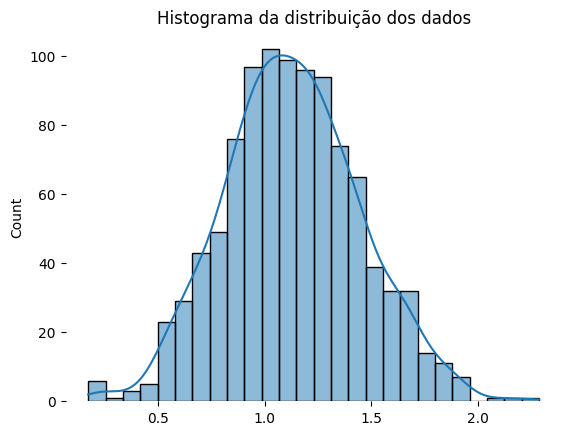


Conclusão: Pela característica e comportamento do gráfico (curva em forma de sino), se conclui que é uma distribuição normal.


In [ ]:
# histograma para verficação de distribuição
print('Além da verificação pelo p-valor, verificaremos o comportamento e curvatura do gráfico de histograma, caso tenha um formato de sino caracteriza-se como uma distribuição normal.\n')
sns.histplot(data_list, kde=True)
plt.title("Histograma da distribuição dos dados")
plt.box(False)
plt.show()
print("\nConclusão: Pela característica e comportamento do gráfico (curva em forma de sino), se conclui que é uma distribuição normal.")

# Teste de hipótese: O algoritmo possui um tempo médio de resposta de até 1.15s.

In [ ]:
print('Verificado que é uma normal, realizaremos o teste de hipótese:\nHo = (tempo médio é <= 1.15s)\nHa = (tempo médio > 1.15s)\n')
trust = 0.05 
x = data_mean[0]
u = 1.15
σ = data_stdev[0]
n = 1000
print('Como o desvio padrão populacional é desconhecido, faremos o teste pela fórmula de t student, utilizaremos também a tabela de distribuição normal.\nPara comprovação da nossa hipótese utilizaremos o nivel de significância de 5%. Cconferindo na tabela verificamos um valor t = 1.960.\nDessa forma, para aceitação da hipótese nula é necessário que o valor obtido pela forma t student seja menor que o valor t crítico, que é o valor obtido na tabela.\n')
t = (x - u) / (σ / (n**0.5))
print(f'Conclusão: Como o valor de t student obtido = {t:.3f} é menor que o valor t crítico obtido da tabela de distribuição t = 1.960, aceitamos a hipótese nula e rejeitamos a alternativa, e assim, concluimos que o tempo médio de resposta do algoritmo é menor ou igual a 1.15s.')

Verificado que é uma normal, realizaremos o teste de hipótese:
Ho = (tempo médio é <= 1.15s)
Ha = (tempo médio > 1.15s)

Como o desvio padrão populacional é desconhecido, faremos o teste pela fórmula de t student, utilizaremos também a tabela de distribuição normal.
Para comprovação da nossa hipótese utilizaremos o nivel de significância de 5%. Cconferindo na tabela verificamos um valor t = 1.960.
Dessa forma, para aceitação da hipótese nula é necessário que o valor obtido pela forma t student seja menor que o valor t crítico, que é o valor obtido na tabela.

Conclusão: Como o valor de t student obtido = -1.904 é menor que o valor t crítico obtido da tabela de distribuição t = 1.960, aceitamos a hipótese nula e rejeitamos a alternativa, e assim, concluimos que o tempo médio de resposta do algoritmo é menor ou igual a 1.15s.
